In [2]:
import pandas as pd

In [241]:
df = pd.read_csv('CrabAgePrediction.csv')
df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


In [163]:
df.describe(include='all')

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,NaN,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,NaN,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,NaN,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,NaN,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,NaN,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000


In [164]:
df.Sex.value_counts()

M    1435
I    1233
F    1225
Name: Sex, dtype: int64

In [165]:
df.Age.value_counts()

9     640
10    598
8     520
11    459
7     357
12    248
6     241
13    195
14    122
5     107
15     96
16     62
17     54
4      53
18     38
19     31
20     23
21     14
3      13
23      7
22      6
27      2
24      2
2       1
1       1
29      1
25      1
26      1
Name: Age, dtype: int64

The maximum age of a crab can vary widely depending on the species. Some species of crab have very short lifespans, while others can live for several decades.

For example, the common blue crab (Callinectes sapidus) typically lives for 1-3 years in the wild, while the Dungeness crab (Metacarcinus magister) can live up to 10 years. The giant Japanese spider crab (Macrocheira kaempferi) is known to live up to 100 years in the wild.

It's important to note that the lifespan of a crab can be affected by a number of factors, including environmental conditions, predation, and disease. So while some crabs have the potential to live for a long time, many may not reach their maximum lifespan due to these factors.

Crabs have an average lifespan of 3 to 5 years, with some species living up to 30 years.

However, this greatly depends on the species of the crab. There are many different crab species, and their age ranges all vary.

Let's remove the rows where age is above 20, since there is very less entries for the values above 20

In [166]:
df1 = df[df['Age']<20]
df1.shape

(3836, 9)

In [167]:
df.isnull().sum()


Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

Let's write a function to convert pounces into kilograms

In [168]:
# Define function to apply to each column
def convert_to_kilograms(column):
    ounces_to_kg = 0.0283495  # conversion factor for ounces to kilograms
    column_in_kg = column * ounces_to_kg
    return column_in_kg



In [169]:
df2 = df1.loc[:,'Weight':'Shell Weight']
df_in_kg = df2.apply(convert_to_kilograms)
df1.loc[:, ['Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']] = df_in_kg.loc[:, ['Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']]
df1

C:\Users\ARAVINTH\AppData\Local\Temp\ipykernel_19512\3076654694.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, ['Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']] = df_in_kg.loc[:, ['Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']]


,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,0.698410,0.349607,0.158328,0.191279,9
1,M,0.8875,0.6500,0.2125,0.153104,0.065099,0.038979,0.044203,6
2,I,1.0375,0.7750,0.2500,0.225436,0.091621,0.045409,0.078360,6
3,F,1.1750,0.8875,0.2500,0.382157,0.134619,0.064697,0.148683,10
4,I,0.8875,0.6625,0.2125,0.195700,0.098051,0.042194,0.048222,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,0.703634,0.330318,0.165963,0.180831,8
3889,F,1.5500,1.2125,0.4375,0.976890,0.438013,0.203335,0.277274,10
3890,I,0.6250,0.4625,0.1625,0.057062,0.021700,0.014868,0.018083,5
3891,I,1.0625,0.7750,0.2625,0.293348,0.127787,0.066305,0.084388,6


Now all the values are converted into kilograms wherever it was in ounces


Next let's write function to convert feet into cms

In [170]:
def feet_to_cm(feet):
    return feet * 30.48


In [171]:
df3 = df1.loc[:,'Length':'Height']
df_in_cms = df3.apply(feet_to_cm)
df1.loc[:,'Length':'Height'] = df_in_cms.loc[:,'Length':'Height']
df1

C:\Users\ARAVINTH\AppData\Local\Temp\ipykernel_19512\2626895602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:,'Length':'Height'] = df_in_cms.loc[:,'Length':'Height']


,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,43.815,35.814,12.573,0.698410,0.349607,0.158328,0.191279,9
1,M,27.051,19.812,6.477,0.153104,0.065099,0.038979,0.044203,6
2,I,31.623,23.622,7.620,0.225436,0.091621,0.045409,0.078360,6
3,F,35.814,27.051,7.620,0.382157,0.134619,0.064697,0.148683,10
4,I,27.051,20.193,6.477,0.195700,0.098051,0.042194,0.048222,6
...,...,...,...,...,...,...,...,...,...
3888,F,44.577,34.671,9.906,0.703634,0.330318,0.165963,0.180831,8
3889,F,47.244,36.957,13.335,0.976890,0.438013,0.203335,0.277274,10
3890,I,19.050,14.097,4.953,0.057062,0.021700,0.014868,0.018083,5
3891,I,32.385,23.622,8.001,0.293348,0.127787,0.066305,0.084388,6


Now all the values are converted into centimeters wherever it was in feet


To find outliers in the any column of a Pandas DataFrame, we can use various statistical methods. One common method is to use the interquartile range (IQR) method, which involves calculating the IQR and then identifying any data points that fall more than 1.5 times the IQR below the first quartile (Q1) or above the third quartile (Q3).

In [172]:
# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
# for all columns
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = q3-q1
IQR

# Find any data points that fall more than 1.5 times the IQR below Q1 or 
#above Q3 for all columns 
# Find the rows containing outliers in any column
outliers = df1[((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).apply(lambda x: x.any(), axis=1)]

# Remove the outliers from the DataFrame
df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the updated DataFrame and the outliers
print("Outliers:")
print(outliers)
print("\nDataFrame without outliers:")
df2         

C:\Users\ARAVINTH\AppData\Local\Temp\ipykernel_19512\3184649409.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df1[((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).apply(lambda x: x.any(), axis=1)]
C:\Users\ARAVINTH\AppData\Local\Temp\ipykernel_19512\3184649409.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]


Outliers:
     Sex  Length  Diameter  Height    Weight  Shucked Weight  Viscera Weight  \
1      M  27.051    19.812   6.477  0.153104        0.065099        0.038979   
2      I  31.623    23.622   7.620  0.225436        0.091621        0.045409   
3      F  35.814    27.051   7.620  0.382157        0.134619        0.064697   
4      I  27.051    20.193   6.477  0.195700        0.098051        0.042194   
8      I  48.387    38.100  12.573  1.196701        0.574641        0.276873   
...   ..     ...       ...     ...       ...             ...             ...   
3887   F  53.340    41.910  12.954  1.353421        0.605584        0.262406   
3889   F  47.244    36.957  13.335  0.976890        0.438013        0.203335   
3890   I  19.050    14.097   4.953  0.057062        0.021700        0.014868   
3891   I  32.385    23.622   8.001  0.293348        0.127787        0.066305   
3892   I  24.003    18.669   6.477  0.115330        0.042596        0.038175   

      Shell Weight  Age  
1  

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,43.815,35.814,12.573,0.698410,0.349607,0.158328,0.191279,9
5,F,47.244,35.433,10.668,0.812535,0.384969,0.191681,0.204942,8
6,F,39.624,30.480,9.906,0.501907,0.172794,0.165963,0.136628,15
7,M,40.386,30.861,11.430,0.668272,0.282900,0.150291,0.202933,10
11,F,41.529,32.004,13.335,0.605985,0.205746,0.142656,0.221016,10
...,...,...,...,...,...,...,...,...,...
3878,F,36.576,27.813,10.287,0.513962,0.236688,0.090817,0.140646,8
3880,M,47.244,36.576,11.430,0.885269,0.399034,0.195298,0.245127,10
3882,I,33.528,27.051,9.144,0.397829,0.185653,0.088406,0.100462,7
3886,F,40.386,31.242,11.049,0.663450,0.301385,0.163954,0.196905,9


<AxesSubplot:>

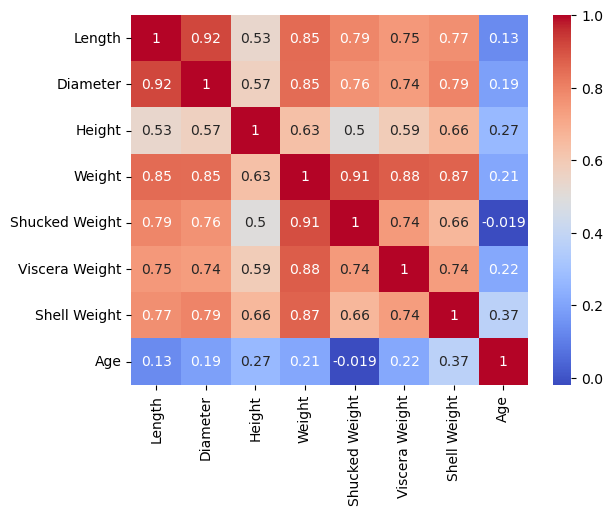

In [173]:
import seaborn as sns

# calculate the correlation matrix
corr_matrix = df2.corr()

# plot the heatmap with values
sns.heatmap(corr_matrix ,cmap='coolwarm',annot=True)

To find multicollinearity in a DataFrame, we can use the variance inflation factor (VIF) which measures the degree of multicollinearity between two or more features in a regression analysis.

In [174]:
import statsmodels.api as sm

In [175]:
X = df2.loc[:,'Length':'Shell Weight']
y = df2['Age']

In [176]:
X = sm.add_constant(X)

In [177]:
X

,const,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,1.0,43.815,35.814,12.573,0.698410,0.349607,0.158328,0.191279
5,1.0,47.244,35.433,10.668,0.812535,0.384969,0.191681,0.204942
6,1.0,39.624,30.480,9.906,0.501907,0.172794,0.165963,0.136628
7,1.0,40.386,30.861,11.430,0.668272,0.282900,0.150291,0.202933
11,1.0,41.529,32.004,13.335,0.605985,0.205746,0.142656,0.221016
...,...,...,...,...,...,...,...,...
3878,1.0,36.576,27.813,10.287,0.513962,0.236688,0.090817,0.140646
3880,1.0,47.244,36.576,11.430,0.885269,0.399034,0.195298,0.245127
3882,1.0,33.528,27.051,9.144,0.397829,0.185653,0.088406,0.100462
3886,1.0,40.386,31.242,11.049,0.663450,0.301385,0.163954,0.196905


In [178]:
model = sm.OLS(y,X).fit()

In [179]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     97.04
Date:                Sat, 11 Mar 2023   Prob (F-statistic):          7.76e-117
Time:                        15:39:05   Log-Likelihood:                -2900.1
No. Observations:                1497   AIC:                             5816.
Df Residuals:                    1489   BIC:                             5859.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.5547      0.762     11.220      0.000       7.059      10.050
Length            -0.1111      0.033     -3.375      0.001      -0.176      -0.047
Diameter           0.0722      0.039      1.837      0.066      -0.005       0.149
Height             0.0780      0.042      1.850      0.064      -0.005       0.161
Weight            13.3734      1.748      7.650      0.000       9.944      16.803
Shucked Weight   -27.2527      1.959    -13.914      0.000     -31.095     -23.411
Viscera Weight    -3.9543      2.902     -1.363      0.173      -9.646       1.738
Shell Weight      12.7879      2.820      4.534      0.000       7.256      18.320
==============================================================================
Omnibus:                      109.819   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.399
Skew:                           0.676   Prob(JB):                     3.97e-30
Kurtosis:                       3.584   Cond. No.                     4.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df2[['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


[753.1541523688662, 811.95404390883, 97.23565255505918, 440.3827362262554, 111.81764225706003, 66.43583498334641, 94.48458269685115]


Length VIF: 753.15 indicates that there is a very high correlation between Length and the other independent variables, suggesting that Length might not be adding much additional information beyond what is already captured by the other variables. This suggests that Length may not be a useful predictor in the model and could be dropped.

Diameter VIF: 811.95 suggests a similar problem as Length, indicating a high correlation with the other variables in the model.

Height VIF: 97.24 suggests a moderate correlation with the other variables in the model. This could potentially be an issue, but it may not be severe enough to cause problems.

Weight VIF: 440.38 suggests a high correlation with the other variables in the model, but not as severe as Length and Diameter. This variable might still be useful, but its contribution to the model may be limited by the high correlation with the other variables.

Shucked Weight VIF: 111.82 suggests a moderate correlation with the other variables in the model, which again could potentially be an issue, but may not be severe enough to cause problems.

Viscera Weight VIF: 66.44 suggests a moderate correlation with the other variables in the model, which again could potentially be an issue, but may not be severe enough to cause problems.

Shell Weight VIF: 94.48 suggests a moderate correlation with the other variables in the model, which again could potentially be an issue, but may not be severe enough to cause problems.

Overall, the VIF values indicate that there is some degree of multicollinearity among the independent variables in the model, particularly with Length, Diameter, and Weight. However, the severity of the problem may not be severe enough to cause significant issues with the interpretation of the coefficients or the predictive power of the model. It may be worth considering dropping Length and Diameter from the model to reduce the multicollinearity and simplify the model.

In [103]:
X = df2.loc[:,'Height':'Shell Weight']
y = df2['Age']

In [104]:
X = sm.add_constant(X)

In [105]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     617.0
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:28:45   Log-Likelihood:                -6862.9
No. Observations:                3518   AIC:                         1.374e+04
Df Residuals:                    3512   BIC:                         1.377e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.9508      0.166     29.897      0.000       4.626       5.275
Height             0.3180      0.026     12.373      0.000       0.268       0.368
Weight           202.4557     29.119      6.953      0.000     145.364     259.548
Shucked Weight  -519.9821     32.848    -15.830      0.000    -584.386    -455.578
Viscera Weight  -105.5795     51.163     -2.064      0.039    -205.892      -5.267
Shell Weight     397.7096     47.905      8.302      0.000     303.785     491.635
==============================================================================
Omnibus:                      300.309   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              395.515
Skew:                           0.729   Prob(JB):                     1.30e-86
Kurtosis:                       3.758   Cond. No.                     2.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
df2['TotalWeight'] = df2['Weight'] + df2['Shucked Weight'] + df2['Viscera Weight'] + df2['Shell Weight']

C:\Users\ARAVINTH\AppData\Local\Temp\ipykernel_19512\1856924680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TotalWeight'] = df2['Weight'] + df2['Shucked Weight'] + df2['Viscera Weight'] + df2['Shell Weight']


In [109]:

# Create a new variable for the total weight
df2['TotalWeight'] = df2['Weight'] + df2['Shucked Weight'] + df2['Viscera Weight'] + df2['Shell Weight']

# Run the regression with the new variable
import statsmodels.api as sm

X = sm.add_constant(df2[['Height', 'TotalWeight']])
y = df['Age']

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     1035.
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:32:53   Log-Likelihood:                -7157.1
No. Observations:                3518   AIC:                         1.432e+04
Df Residuals:                    3515   BIC:                         1.434e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.9463      0.174     22.701      

C:\Users\ARAVINTH\AppData\Local\Temp\ipykernel_19512\4175368007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TotalWeight'] = df2['Weight'] + df2['Shucked Weight'] + df2['Viscera Weight'] + df2['Shell Weight']


In the above summary, we have two predictor variables - Height and TotalWeight, and a dependent variable - Age. The R-squared value of 0.371 indicates that the model explains 37.1% of the variability in the dependent variable. The p-value of TotalWeight is 0.615, which is greater than the significance level of 0.05, indicating that it is not a significant predictor of Age. Therefore, we can conclude that only Height is a significant predictor of Age in this model. The condition number of 1.25e+03 indicates that there might be some multicollinearity or other numerical problems in the model.

Based on the  analyses, it seems that the most important features for predicting the age of crabs are sex,height, weight, shucked weight, viscera weight, and shell weight. Therefore, we can use these five features as predictors for the age of the crabs.

In [111]:
df2

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,TotalWeight
0,F,43.815,35.814,12.573,0.019800,0.009911,0.004489,0.005423,9,0.039622
1,M,27.051,19.812,6.477,0.004340,0.001846,0.001105,0.001253,6,0.008544
2,I,31.623,23.622,7.620,0.006391,0.002597,0.001287,0.002221,6,0.012497
3,F,35.814,27.051,7.620,0.010834,0.003816,0.001834,0.004215,10,0.020700
4,I,27.051,20.193,6.477,0.005548,0.002780,0.001196,0.001367,6,0.010891
...,...,...,...,...,...,...,...,...,...,...
3888,F,44.577,34.671,9.906,0.019948,0.009364,0.004705,0.005126,8,0.039143
3889,F,47.244,36.957,13.335,0.027694,0.012417,0.005764,0.007861,10,0.053737
3890,I,19.050,14.097,4.953,0.001618,0.000615,0.000422,0.000513,5,0.003167
3891,I,32.385,23.622,8.001,0.008316,0.003623,0.001880,0.002392,6,0.016211


In [112]:
df3 = df2[['Sex','Height','Weight','Shucked Weight','Viscera Weight','Shell Weight','Age']]
df3

,Sex,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,12.573,0.019800,0.009911,0.004489,0.005423,9
1,M,6.477,0.004340,0.001846,0.001105,0.001253,6
2,I,7.620,0.006391,0.002597,0.001287,0.002221,6
3,F,7.620,0.010834,0.003816,0.001834,0.004215,10
4,I,6.477,0.005548,0.002780,0.001196,0.001367,6
...,...,...,...,...,...,...,...
3888,F,9.906,0.019948,0.009364,0.004705,0.005126,8
3889,F,13.335,0.027694,0.012417,0.005764,0.007861,10
3890,I,4.953,0.001618,0.000615,0.000422,0.000513,5
3891,I,8.001,0.008316,0.003623,0.001880,0.002392,6


In [113]:
corr_matrix3 = df3.corr()

<AxesSubplot:>

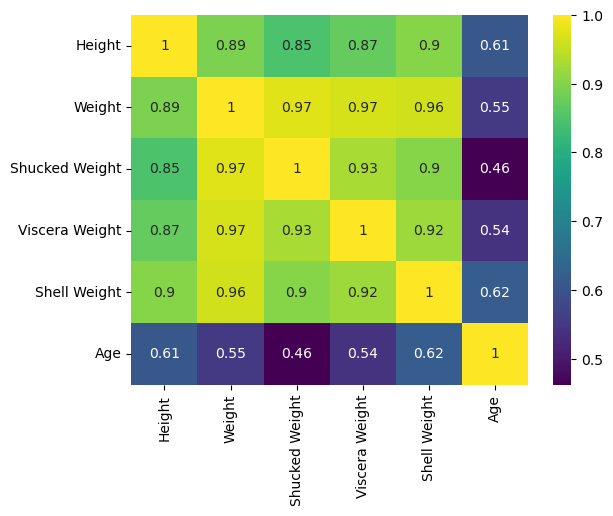

In [117]:
sns.heatmap(corr_matrix3,cmap='viridis',annot=True)

In [129]:
# apply one-hot encoding to the "Sex" column
one_hot_sex = pd.get_dummies(df3.Sex)

# concatenate the one-hot encoded columns with the original DataFrame
df4 = pd.concat([df3,one_hot_sex],axis =1)

# remove the original "Sex" column
df4.drop(columns='Sex',inplace=True)

# view the updated DataFrame
df4.head()

,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,F,I,M
0,12.573,0.019800,0.009911,0.004489,0.005423,9,1,0,0
1,6.477,0.004340,0.001846,0.001105,0.001253,6,0,0,1
2,7.620,0.006391,0.002597,0.001287,0.002221,6,0,1,0
3,7.620,0.010834,0.003816,0.001834,0.004215,10,1,0,0
4,6.477,0.005548,0.002780,0.001196,0.001367,6,0,1,0


StandardScaler is a preprocessing step in machine learning that standardizes features by removing the mean and scaling to unit variance. This is important because many machine learning algorithms assume that the data is normally distributed with zero mean and unit variance. StandardScaler applies the following transformation to each feature:

$$z = \frac{x - \mu}{\sigma}$$

where x is the original feature, μ is the mean of that feature, σ is the standard deviation of that feature, and z is the standardized feature.

Using StandardScaler can improve the performance of many machine learning algorithms, especially those that are sensitive to the scale of the input features, such as gradient descent based algorithms.

In Python, we can use the StandardScaler class from the sklearn.preprocessing module to perform standardization

In [139]:
from sklearn.preprocessing import StandardScaler

# select the columns to be scaled
columns_to_scale = ['Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']

# create a new dataframe with the selected columns
df_scaled = df5[columns_to_scale].copy()

# create a StandardScaler object and fit_transform the selected columns
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_scaled)

# create new column names for the scaled values
new_column_names = [col + '_scaled' for col in columns_to_scale]

# create a new dataframe with the scaled values and new column names
df_scaled = pd.DataFrame(data=scaled_values, columns=new_column_names)

# concatenate the scaled dataframe with the original dataframe
df6 = pd.concat([df5, df_scaled], axis=1)

# drop the original unscaled columns
df6.drop(columns_to_scale, axis=1, inplace=True)

# display the resulting dataframe
df6.head()


,Age,F,I,M,Height_scaled,Weight_scaled,Shucked Weight_scaled,Viscera Weight_scaled,Shell Weight_scaled
0,9.0,1.0,0.0,0.0,0.781988,0.168567,0.426865,0.225305,0.091567
1,6.0,0.0,0.0,1.0,-1.498897,-1.364397,-1.317876,-1.250467,-1.407891
2,6.0,0.0,1.0,0.0,-1.071231,-1.161056,-1.155230,-1.170964,-1.059656
3,10.0,1.0,0.0,0.0,-1.071231,-0.720484,-0.891548,-0.932455,-0.342702
4,6.0,0.0,1.0,0.0,-1.498897,-1.244651,-1.115801,-1.210715,-1.366922


In [148]:
df6.isnull().sum()

Age                      333
F                        333
I                        333
M                        333
Height_scaled            333
Weight_scaled            333
Shucked Weight_scaled    333
Viscera Weight_scaled    333
Shell Weight_scaled      333
dtype: int64

In [150]:
df6.fillna(df6.mean(),inplace=True)
df6.isnull().sum()

Age                      0
F                        0
I                        0
M                        0
Height_scaled            0
Weight_scaled            0
Shucked Weight_scaled    0
Viscera Weight_scaled    0
Shell Weight_scaled      0
dtype: int64

# Train Test Split


In machine learning, it is essential to evaluate the performance of a model on unseen data to measure its effectiveness. The train-test split method is a technique used to estimate how well a model can predict outcomes for new, unseen data.

The train-test split involves splitting the dataset into two separate sets: a training set and a test set. The training set is used to train the model, and the test set is used to evaluate the model's performance on unseen data.

Typically, the training set contains a significant proportion of the data, while the test set contains a smaller proportion, usually around 20-30%. This split helps ensure that the model is not overfitting to the training data and can generalize well to new data.

The train-test split is an essential step in the machine learning pipeline, as it provides an estimate of the model's performance on unseen data, which is the ultimate goal of any machine learning model.

In [151]:
from sklearn.model_selection import train_test_split

X = df6.drop(columns='Age',axis=1)# Features or inputs
y = df6['Age'] # Target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
print('Shape of X train :' , X_train.shape)
print('Shape of X test :' , X_test.shape)

Shape of X train : (3080, 8)
Shape of X test : (771, 8)


This will split the data into training and testing sets, with 80% of the data used for training and 20% used for testing. The random_state parameter sets the seed for the random number generator, ensuring that the same split is obtained every time the code is run.

# Linear regression 

It is a statistical method used to establish a relationship between a dependent variable and one or more independent variables. The goal of linear regression is to fit a line or a hyperplane that can best explain the relationship between the dependent variable and the independent variable(s). In other words, linear regression helps us to predict the value of a dependent variable based on the values of one or more independent variables.

In simple linear regression, there is only one independent variable, whereas in multiple linear regression, there are two or more independent variables. The line or hyperplane of best fit is determined by minimizing the sum of the squared errors between the actual and predicted values.

In [153]:
from sklearn.linear_model import LinearRegression

# Instantiate the model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Predict on the test data
y_pred = lr.predict(X_test)

# Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error
print("R-squared:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R-squared: 0.27003148100352914
MSE: 3.506691707185735


In [217]:
df2

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,43.815,35.814,12.573,0.698410,0.349607,0.158328,0.191279,9
5,F,47.244,35.433,10.668,0.812535,0.384969,0.191681,0.204942,8
6,F,39.624,30.480,9.906,0.501907,0.172794,0.165963,0.136628,15
7,M,40.386,30.861,11.430,0.668272,0.282900,0.150291,0.202933,10
11,F,41.529,32.004,13.335,0.605985,0.205746,0.142656,0.221016,10
...,...,...,...,...,...,...,...,...,...
3878,F,36.576,27.813,10.287,0.513962,0.236688,0.090817,0.140646,8
3880,M,47.244,36.576,11.430,0.885269,0.399034,0.195298,0.245127,10
3882,I,33.528,27.051,9.144,0.397829,0.185653,0.088406,0.100462,7
3886,F,40.386,31.242,11.049,0.663450,0.301385,0.163954,0.196905,9


In [220]:
# apply one-hot encoding to the "Sex" column
one_hot_sex = pd.get_dummies(df2.Sex, prefix='Sex', prefix_sep='_')

# concatenate the one-hot encoded columns with the original DataFrame
df3 = pd.concat([df2,one_hot_sex],axis =1)

# remove the original "Sex" column
df3.drop(columns='Sex',inplace=True)

# view the updated DataFrame
df3.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,43.815,35.814,12.573,0.698410,0.349607,0.158328,0.191279,9,1,0,0
5,47.244,35.433,10.668,0.812535,0.384969,0.191681,0.204942,8,1,0,0
6,39.624,30.480,9.906,0.501907,0.172794,0.165963,0.136628,15,1,0,0
7,40.386,30.861,11.430,0.668272,0.282900,0.150291,0.202933,10,0,0,1
11,41.529,32.004,13.335,0.605985,0.205746,0.142656,0.221016,10,1,0,0


SimpleImputer is a class in scikit-learn library that provides methods to replace missing values in a dataset. It replaces the missing values with a specified strategy, such as mean, median, most_frequent or constant.

In [228]:
# Fit and transform the SimpleImputer
imputer = SimpleImputer(strategy='mean')
df4 = df3.drop(columns = 'Age',axis=1)
imputed_data = imputer.fit_transform(df4)

# Convert the imputed data back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=df4.columns)

# Replace the original NaN values with the imputed values
X.loc[:, :] = imputed_df



In [240]:
df2.shape

(1497, 9)

In [237]:
imputed_df['Age'] = df3['Age']
imputed_df.shape

(1497, 11)

In [215]:
from sklearn.preprocessing import StandardScaler

# select the columns to be scaled
columns_to_scale = ['Length','Diameter','Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']

# create a new dataframe with the selected columns
df_scaled = imputed_df[columns_to_scale].copy()

# create a StandardScaler object and fit_transform the selected columns
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_scaled)

# create new column names for the scaled values
new_column_names = [col + '_scaled' for col in columns_to_scale]

# create a new dataframe with the scaled values and new column names
df_scaled = pd.DataFrame(data=scaled_values, columns=new_column_names)

# concatenate the scaled dataframe with the original dataframe
df4 = pd.concat([imputed_df, df_scaled], axis=1)

# drop the original unscaled columns
df4.drop(columns_to_scale, axis=1, inplace=True)

# display the resulting dataframe
df4.head()


KeyError: "None of [Index(['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',\n       'Viscera Weight', 'Shell Weight'],\n      dtype='object')] are in the [columns]"

In [209]:
from sklearn.model_selection import train_test_split

X = df4.drop(columns='Age',axis=1)# Features or inputs
y = df4['Age'] # Target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [210]:
from sklearn.linear_model import LinearRegression

# Instantiate the model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Predict on the test data
y_pred = lr.predict(X_test)

# Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error
print("R-squared:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').